In [12]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Salary_Data.csv')

In [3]:
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [4]:
df['Salary'].max()

122391.0

In [5]:
df.shape

(30, 2)

In [6]:
#visualization --> 

# SEPARATE INPUT AND O/P VARIABLE

In [18]:
# i/p --> 2D ,o/p --> 1D

x = df[['YearsExperience']]
y = df['Salary']

# EXPLOTR THE DATA

Text(0, 0.5, 'Salary')

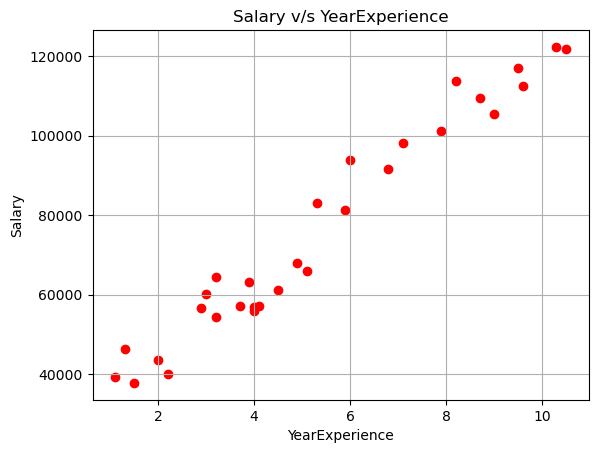

In [19]:
plt.title('Salary v/s YearExperience')
plt.grid()
plt.scatter(x,y,color = 'r')
plt.xlabel('YearExperience')
plt.ylabel('Salary')


In [20]:

#corelation coefficient --> two group of values linearly connected to each other lieing in range(-1 to +1)
# (+80 -100 % -> highly  +velt corelated)

df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


# cross validation (train_test)

In [30]:
from sklearn.model_selection import train_test_split

#default split --> 75%training, 25% testing

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0)

In [32]:
x_train.shape

(22, 1)

In [29]:
x_test.shape

(8, 1)

In [33]:
print(x_train)

    YearsExperience
17              5.3
22              7.9
5               2.9
16              5.1
8               3.2
14              4.5
23              8.2
20              6.8
1               1.3
29             10.5
6               3.0
4               2.2
18              5.9
19              6.0
9               3.7
7               3.2
25              9.0
3               2.0
0               1.1
21              7.1
15              4.9
12              4.0


In [34]:
x_train

,YearsExperience
17,5.3
22,7.9
5,2.9
16,5.1
8,3.2
14,4.5
23,8.2
20,6.8
1,1.3
29,10.5


# BUILD THE ML LEARNING MODEL

In [36]:
# import class
from sklearn.linear_model import LinearRegression

In [37]:
# create object

regressor = LinearRegression()

In [39]:
#train the algorithm
regressor.fit(x_train, y_train)

LinearRegression()

In [41]:
# slope
regressor.coef_

array([9379.71049195])

In [43]:
#y intercept
regressor.intercept_

26986.691316737248

# predit an unseen data

In [49]:
import warnings

warnings.filterwarnings("ignore")

In [50]:
regressor.predict([[12]])

array([139543.21722009])

In [51]:
regressor.predict([[13]])

array([148922.92771204])

In [52]:
regressor.predict([[14]])

array([158302.63820398])

In [54]:
regressor.predict([[10.5]])

array([125473.65148217])

# performance evaluation

In [55]:
# predict on the test dataset
y_pred = regressor.predict(x_test)

In [57]:
#compare
result = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

In [58]:
result

,Actual,Predicted
2,37731.0,41056.257055
28,122391.0,123597.709384
13,57081.0,65443.504334
10,63218.0,63567.562235
26,116969.0,116093.940990
24,109431.0,108590.172597
27,112635.0,117031.912039
11,55794.0,64505.533285


In [59]:
# error between predicted and actual values --> residual error


In [61]:
import numpy as np

In [62]:
#avg difference 
#mean absolute error

np.mean(abs(y_test - y_pred))


3508.5455930660555

In [67]:
#direct in built function bhi hota h froms sklearn.metrics

from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

3508.5455930660555

In [73]:
#to find accurary --> 2 methods --> error and actual
# r squared error --> shows accuracy of linearity of these data

In [74]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, y_pred)


0.05754512646779697

In [75]:
#accuracy of linearity/ r-quared error
regressor.score(x_train, y_train)

0.9395413526983522

In [76]:
regressor.score(x_test, y_test)

0.9779208335417602

In [77]:
# predict the result using these model

y_pred = regressor.predict(x)

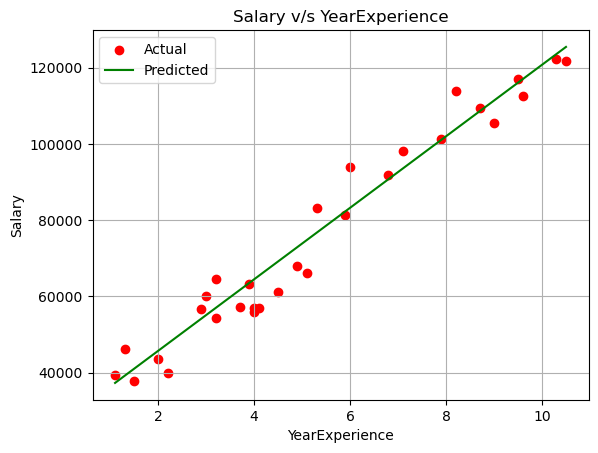

In [80]:
plt.title('Salary v/s YearExperience')
plt.grid()
plt.scatter(x,y,color = 'r', label = 'Actual')
plt.plot(x,y_pred,color = 'g', label = 'Predicted')
plt.xlabel('YearExperience')
plt.ylabel('Salary')
           
plt.legend()


In [81]:
# distance from the centre of red dots is residual error


In [82]:
regressor.predict([[15]])

array([167682.34869593])

In [85]:
15*regressor.coef_[0] + regressor.intercept_         #y = mx+c

167682.34869592747